In [1]:
#Importation des différents package pour l'exploration et la datavisualisation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lecture du data set 'Events'
events = pd.read_csv('PycharmProjects/Projet-Fil-Rouge/DataSets/events.csv', sep= ',')

#Affichage des 5 premières lignes
events.head()

,timestamp,visitorid,event,itemid,transactionid
0,1433221332117,257597,view,355908,NaN
1,1433224214164,992329,view,248676,NaN
2,1433221999827,111016,view,318965,NaN
3,1433221955914,483717,view,253185,NaN
4,1433221337106,951259,view,367447,NaN


Nous allons réaliser une analyse de segmentation des visiteurs en se basant sur les événements réalisés et les articles achetés. Dans un premier, la variable 'event' sera dichotomisée afin de faire ressortir le poids de chaque type d'action.

In [3]:
events = events.join(pd.get_dummies(events['event'], prefix_sep='_'))

Les variables d'interêt sont ensuite regroupées dans un nouveau dataset appelé profil_visitor

In [4]:
profil_visitor = events.groupby('visitorid').agg({'view': 'sum', 'addtocart': 'sum', 'transaction': 'sum', 'itemid': 'count'})
profil_visitor = profil_visitor.reset_index()

In [5]:
profil_visitor.sort_values(by = 'transaction', ascending = False).head(8)

,visitorid,view,addtocart,transaction,itemid
1150086,1150086,6479.0,719.0,559.0,7757
152963,152963,2304.0,371.0,349.0,3024
530559,530559,3623.0,419.0,286.0,4328
684514,684514,1826.0,231.0,189.0,2246
861299,861299,1573.0,230.0,188.0,1991
76757,76757,1402.0,296.0,185.0,1883
138131,138131,1231.0,207.0,173.0,1611
890980,890980,662.0,210.0,145.0,1017


Ce premier aperçu de la base de données laisse présager de fortes variations dans la distribution des variables
et donc la présence d'outliers. Ce qui se confirme grâce à la boite à moustaches suivant :

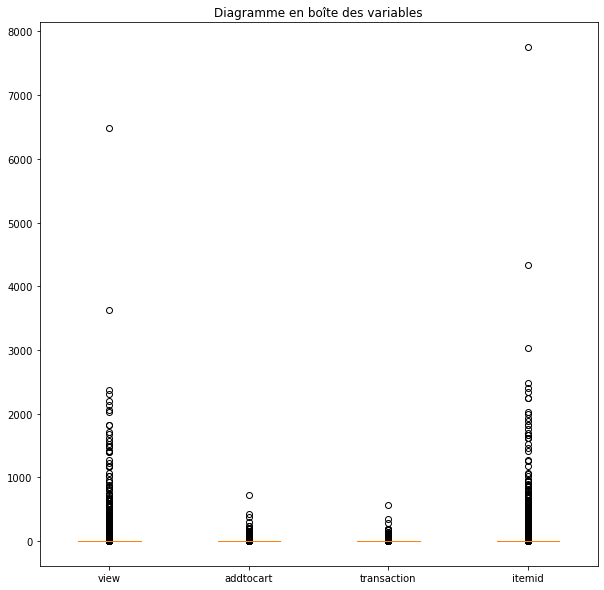

In [6]:
boxplot_var = profil_visitor.drop(['visitorid'], axis = 1)
liste = [boxplot_var['view'], boxplot_var['addtocart'], boxplot_var['transaction'], boxplot_var['itemid']]

plt.figure(figsize =(10,10))
plt.title('Diagramme en boîte des variables')
plt.boxplot(liste, labels = ['view', 'addtocart', 'transaction', 'itemid'])
plt.show();

Étant donné l'échelle différente des variables, il est préférable de réaliser les boites à moustaches séparément 
afin de mieux faire ressortir ces valeurs extrêmes.

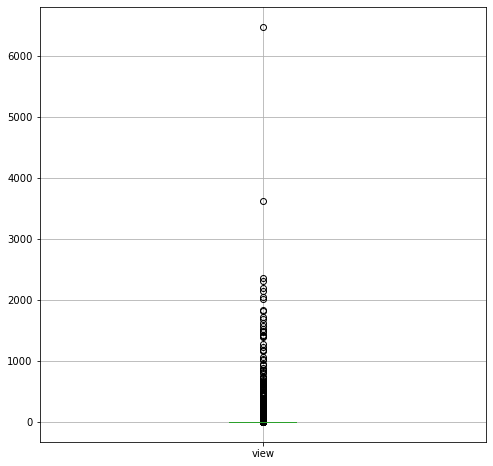

In [7]:
#Boxplot de la variable 'view'
profil_visitor.boxplot(column= 'view', figsize= (8,8));   
#Conclusion : à enlever view > 3000 (2 outliers)

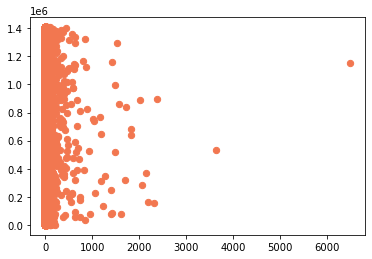

In [8]:
#Nuage de points de la variable 'view'
plt.scatter(profil_visitor.view, profil_visitor.index, c ='#f27750', s=40);

In [9]:
#Les visiteurs qui ont fait plus de 3 000 vues
profil_visitor[profil_visitor['view'] > 3000]

,visitorid,view,addtocart,transaction,itemid
530559,530559,3623.0,419.0,286.0,4328
1150086,1150086,6479.0,719.0,559.0,7757


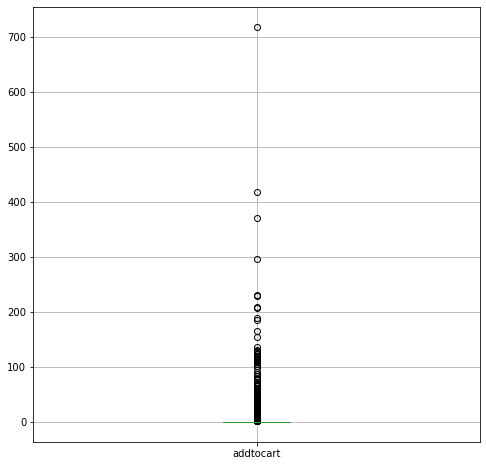

In [10]:
#Boxplot de la variable 'addtocart'
profil_visitor.boxplot(column= 'addtocart', figsize= (8,8));   
#Conclusion : à enlever addtocart > 270 (4 outliers)

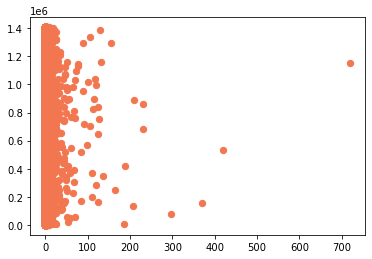

In [11]:
#Nuage de points de la variable 'addtocart'
plt.scatter(profil_visitor.addtocart, profil_visitor.index, c ='#f27750', s=40);

In [12]:
#Les visiteurs qui ont fait plus de 270 mises au panier
profil_visitor[profil_visitor['addtocart'] > 270]

,visitorid,view,addtocart,transaction,itemid
76757,76757,1402.0,296.0,185.0,1883
152963,152963,2304.0,371.0,349.0,3024
530559,530559,3623.0,419.0,286.0,4328
1150086,1150086,6479.0,719.0,559.0,7757


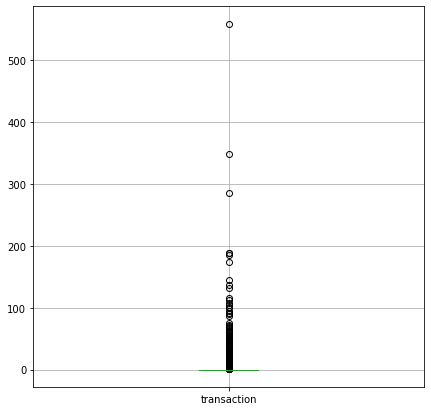

In [13]:
#Boxplot de la variable 'transaction'
profil_visitor.boxplot(column= 'transaction', figsize= (7,7));   
#Conclusion : à enlever transaction > 200 (3 outliers)

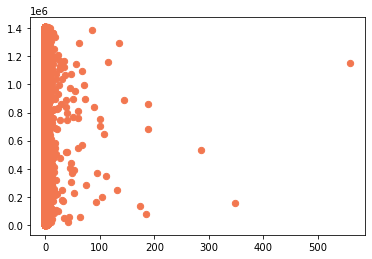

In [14]:
#Nuage de points de la variable 'transaction'
plt.scatter(profil_visitor.transaction, profil_visitor.index, c ='#f27750', s=40);

In [15]:
#Les visiteurs qui ont fait plus de 200 mises au panier
profil_visitor[profil_visitor['transaction'] > 200]

,visitorid,view,addtocart,transaction,itemid
152963,152963,2304.0,371.0,349.0,3024
530559,530559,3623.0,419.0,286.0,4328
1150086,1150086,6479.0,719.0,559.0,7757


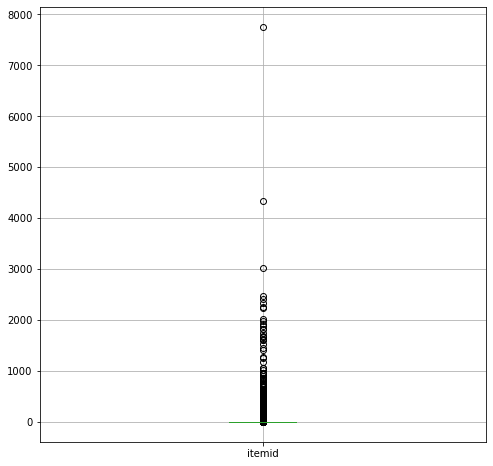

In [16]:
#Boxplot de la variable 'itemid'
profil_visitor.boxplot(column= 'itemid', figsize= (8,8));   
#Conclusion : à enlever itemid > 2800 (3 outliers)

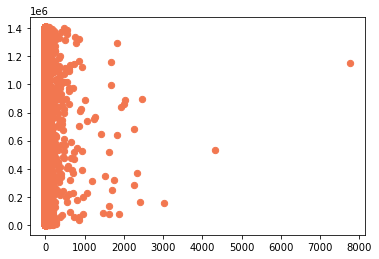

In [17]:
#Nuage de points de la variable 'itemid'
plt.scatter(profil_visitor.itemid, profil_visitor.index, c ='#f27750', s=40);

In [18]:
#Les visiteurs qui ont acheté plus de 2 800 articles
profil_visitor[profil_visitor['itemid'] > 2800]

,visitorid,view,addtocart,transaction,itemid
152963,152963,2304.0,371.0,349.0,3024
530559,530559,3623.0,419.0,286.0,4328
1150086,1150086,6479.0,719.0,559.0,7757


On remarque que les outliers concernent globalement les mêmes visiteurs. Affichons-les :

In [6]:
profil_visitor[(profil_visitor['view'] > 3000) |(profil_visitor['addtocart'] > 270) | (profil_visitor['transaction'] > 200) |(profil_visitor['itemid'] > 2800)]

,visitorid,view,addtocart,transaction,itemid
76757,76757,1402.0,296.0,185.0,1883
152963,152963,2304.0,371.0,349.0,3024
530559,530559,3623.0,419.0,286.0,4328
1150086,1150086,6479.0,719.0,559.0,7757


Les comportements des ces outliers différent grandement des autres visiteurs lorsqu'on analyse la distribution globale 
des variables d'intérêt. Ces visiteurs peuvent être tout aussi bien des gros clients (i.e grandes entreprises) qui passent 
de nombreuses commandes sur le site ou des robots. Étant donné le contexte métier et le modèle de clustering que l'on se
propose de faire, les outliers seront gardés. Néanmoins, ils sont susceptibles d'être enlevés dans d'autres modélisations 
de machine learning qui sont en principe plus sensibles à ces valeurs extrêmes.

Avant de procéder au clustering des visiteurs, il est important de standardiser les données qui sont présentées suivant des échelles de grandeurs différentes. Deux choix sont souvent opposés : la normalisation ou la standardisation. Alors que la normalisation consiste à redimensionner les valeurs dans un intervalle fixe [0,1], la standardisation permet de redimensionner les données suivant une loi normale de moyenne nulle et variance unitaire.Ces deux techniques de feature scaling permettent de réduire la variance des variables et de minimiser du même coup l'effet des outliers.
Grace à une analyse de la fonction de densité propre à chaque variable en diagonale, on peut voir que les features ne suivent une distribution normale. Le choix de la méthode de preprocessing se portera donc sur la normalisation Min-Max.

<Figure size 720x720 with 0 Axes>

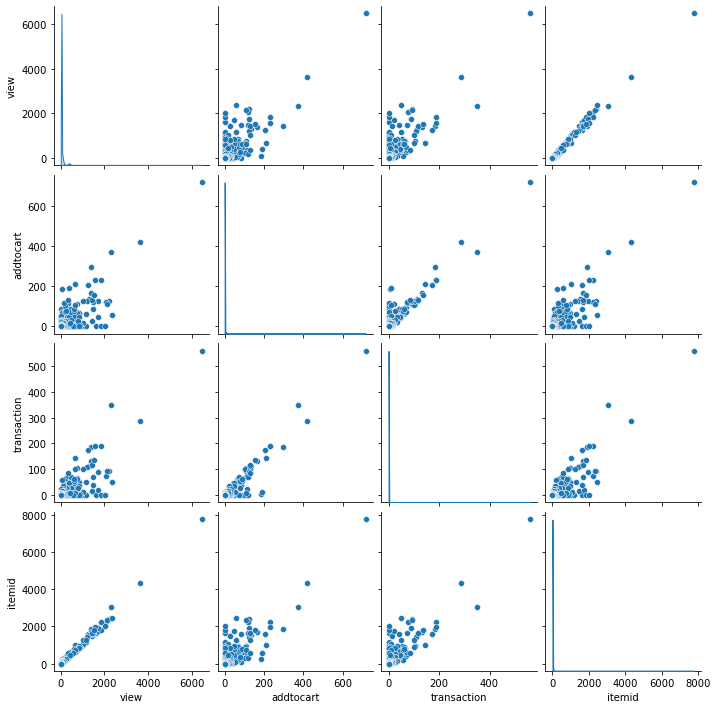

In [20]:
plt.figure(figsize =(10,10))

sns.pairplot(profil_visitor.iloc[:,1:5], diag_kind = 'kde')

In [21]:
#Complément : Le test normalité d'une distribution statistique peut-être affectué avec le test Shapiro-Wilk. 
#Ce test est néanmoins moins précis lorsque la taille de l'échantillon dépasse 5 000. On lui préférera le test 
#d'Anderson-Darling (variante du test de Kolmogorov-Smirnov) qui admet sous l'hypothèse nulle une distribution normale.
#Si la statistique du test est supérieure à la valeur critique pour un niveau de significativté donné, on rejette H0.

from scipy.stats import anderson
print('Pour le feature "View" :', anderson(profil_visitor.view, dist='norm'))
print('\n')
print('Pour le feature "Addtocart" :',anderson(profil_visitor.addtocart, dist='norm'))
print('\n')
print('Pour le feature "Transaction" :', anderson(profil_visitor.transaction, dist='norm'))
print('\n')
print('Pour le feature "Itemid" :', anderson(profil_visitor.itemid, dist='norm'))

Pour le feature "View" : AndersonResult(statistic=440594.69080016855, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


Pour le feature "Addtocart" : AndersonResult(statistic=505857.0297755287, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


Pour le feature "Transaction" : AndersonResult(statistic=529988.809928492, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


Pour le feature "Itemid" : AndersonResult(statistic=446873.5299762443, critical_values=array([0.576, 0.656, 0.787, 0.918, 1.092]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


In [7]:
#Étape de preprocessing des données : Normalisation Min-Max
#On sépare les données 
data = profil_visitor.drop(['visitorid'], axis = 1)

#On normalise
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), columns= data.columns)

Passons maintenant à la segmentation des visiteurs. Au vue de la taille de l'échantillon de données et des paramètres de 
regroupement (4 variables), on peut supposer que le nombre de clusteurs est supérieur à 2. Utilisons la courbe de distorsion
pour déterminer le nombre de clusters optimal.

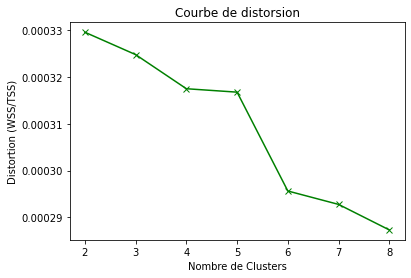

In [21]:
from scipy.spatial.distance import cdist    
from sklearn.cluster import KMeans

nb_clusters = [2, 3, 4, 5, 6, 7, 8]          
distortions = []                            

for id_cluster in nb_clusters:
    cluster = KMeans(n_clusters = id_cluster)  
    cluster.fit(data_scaled)                            
    distortions.append(sum(np.min(cdist(data_scaled, cluster.cluster_centers_, 'euclidean'), axis=1)) / np.size(data_scaled, axis = 0))

# Visualisation des distortions en fonction du nombre de clusters
plt.plot(nb_clusters, distortions, 'gx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Distortion (WSS/TSS)')
plt.title('Courbe de distorsion');

La courbe de distorsion montre que le nombre de clusters optimal est 6 (décroissance régulière après une décroissance rapide). L'analyse des coefficients silhouette, qui mesurent à la fois l'homogénéité intra-cluster et la séparation inter-clusters,confirme également ce résultat.

In [28]:
from sklearn.metrics import silhouette_score

s_scores = [] # Initialisation de la liste des coefficients de la silhouette score

for id_cluster in nb_clusters:
    cluster = KMeans(n_clusters = id_cluster)  
    cluster.fit(data_scaled)                            
    labels = cluster.labels_
    s_score = silhouette_score(data_scaled, labels, metric='sqeuclidean')
    s_scores.append(s_score)
    
# Visualisation
plt.plot(nb_clusters, s_scores, 'gx-')
plt.xlabel('Nombre de Clusters')
plt.ylabel('Coefficient de silhouette')
plt.title("Coefficient de silhouette pour l'algorithme KMeans")
plt.show();

KeyboardInterrupt: 

A l'aide d'un dendogramme on peut visualiser de manière hérarchique les données. Vue que la première ligne du dendogramme
représente l'ensemble des données (+ 1,4 millions de visiteurs), on ne peut que représenter un petit échantillon assez 
représentatif des données (0.25%).Pour finir, le dendogramme affiché sera un dendogramme tronqué qui montrera les 80 derniers regroupements de clusters grâce au paramètre 'truncate_mode'.

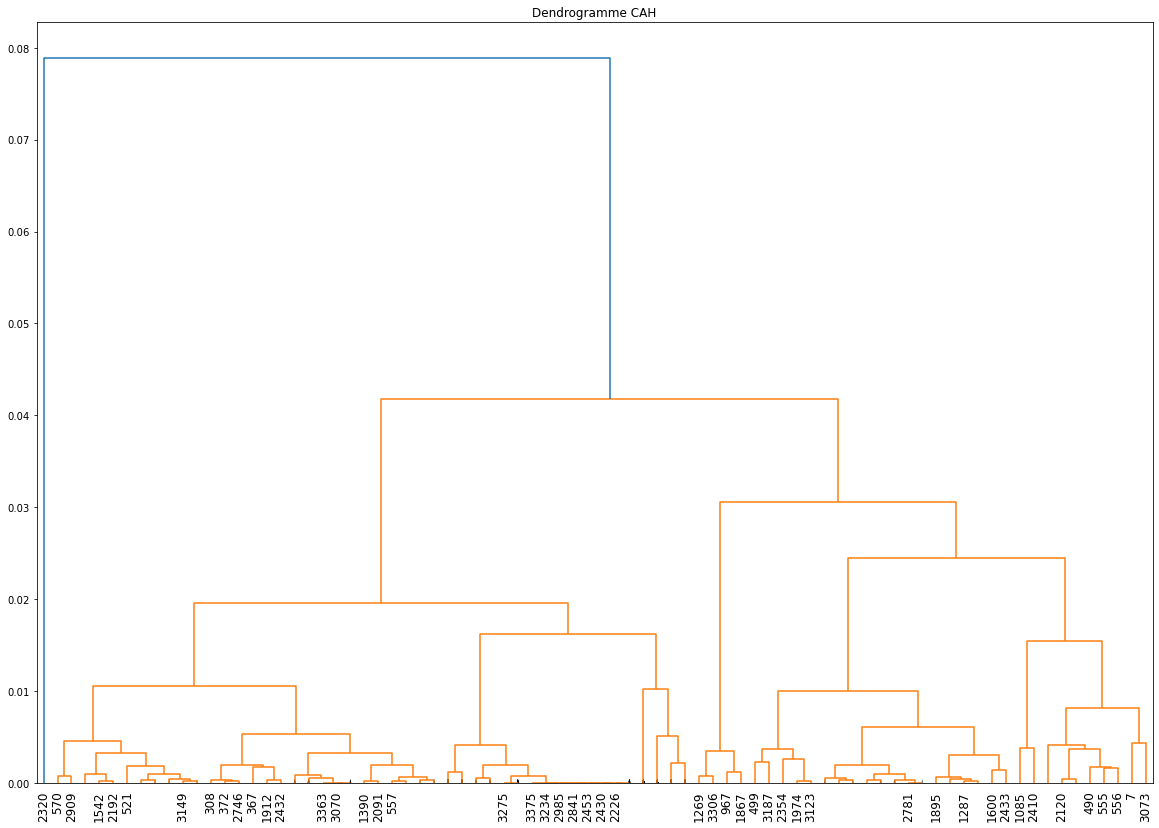

In [19]:
from scipy.cluster.hierarchy import dendrogram, linkage

sample = data_scaled.sample(frac=0.0025, replace=True, random_state=10) #échantillon de taille 0.25%

plt.figure(figsize=(20, 14))
Z = linkage(sample, method = 'ward', metric = 'euclidean')
plt.title("Dendrogramme CAH")
dendrogram(Z,truncate_mode='lastp', p=80,show_leaf_counts=False, leaf_rotation=90.,leaf_font_size=12.,show_contracted=True);

Selon les résultats précédents le nombre de clusters optimal serait de 6. Reprenons alors le regroupement avec 6 classes grâce à l'algorithme KMeans.

In [29]:
kmeans_final = KMeans(n_clusters = 6)
kmeans_final.fit(data_scaled)

centroids_final = kmeans_final.cluster_centers_  #les centroids 
labels_final = kmeans_final.labels_              #liste des visteurs et leurs clusteurs

In [30]:
centroids_final

array([[2.67075627e-04, 4.62473886e-05, 1.61092625e-05, 9.96183522e-05],
       [2.38212834e-01, 1.92661766e-01, 1.89028026e-01, 2.30347012e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [8.23172300e-02, 5.66614511e-02, 4.12939773e-02, 7.68638796e-02],
       [4.57400833e-01, 5.49374131e-01, 5.67978533e-01, 4.73826715e-01],
       [7.86986827e-03, 7.37026614e-03, 2.77124984e-03, 7.32816227e-03]])

Une fois les clusters formés, étudions maintenant leurs caractéristiques, i-e les profils des visiteurs qui les 
composent. Ajoutons les identifiants des clusters dans le data set afin de mieux visualiser les visiteurs et leurs appartenances.

In [31]:
profil_visitor['cluster_id'] = labels_final
profil_visitor.head()

,visitorid,view,addtocart,transaction,itemid,cluster_id
0,0,3.0,0.0,0.0,3,0
1,1,1.0,0.0,0.0,1,0
2,2,8.0,0.0,0.0,8,0
3,3,1.0,0.0,0.0,1,0
4,4,1.0,0.0,0.0,1,0


In [32]:
#Profil des clusters
summary = profil_visitor.groupby('cluster_id').agg({'visitorid': 'count', 'view': 'sum', 'addtocart': 'sum', 'transaction': 'sum', 'itemid': 'sum'})
summary

,visitorid,view,addtocart,transaction,itemid
cluster_id,,,,,
0,1404763,2430778.0,46711.0,12650.0,2490139
1,21,32411.0,2909.0,2219.0,37539
2,1,6479.0,719.0,559.0,7757
3,96,51200.0,3911.0,2216.0,57327
4,2,5927.0,790.0,635.0,7352
5,2697,137517.0,14292.0,4178.0,155987


Les résultats de ce regroupement montre que les outliers ont fortement influencé la constitution des clusters. A titre 
d'exemple, un visiteur unique (visitor id 1150086) forme à lui seul un cluster. Afin de rendre plus compacte les clusters on choisira au final de laisser le nombre total à 4.

In [33]:
kmeans_final2 = KMeans(n_clusters = 4)
kmeans_final2.fit(data_scaled)

centroids_final2 = kmeans_final2.cluster_centers_  #les centroids 
labels_final2 = kmeans_final2.labels_              #liste des visteurs et leurs clusteurs

In [34]:
centroids_final2

array([[2.80609394e-04, 5.99333093e-05, 2.11578526e-05, 1.12556415e-04],
       [2.31960951e-01, 1.78198887e-01, 1.76654741e-01, 2.22891955e-01],
       [6.38267222e-01, 6.99582754e-01, 7.11985689e-01, 6.49217810e-01],
       [7.09923873e-02, 4.59755933e-02, 3.24167580e-02, 6.57732203e-02]])

In [39]:
profil_visitor['cluster_id_final'] = labels_final2
profil_visitor.head()

,visitorid,view,addtocart,transaction,itemid,cluster_id,cluster_id_final
0,0,3.0,0.0,0.0,3,0,0
1,1,1.0,0.0,0.0,1,0,0
2,2,8.0,0.0,0.0,8,0,0
3,3,1.0,0.0,0.0,1,0,0
4,4,1.0,0.0,0.0,1,0,0


In [41]:
#Profil des clusters finaux
summary2 = profil_visitor.groupby('cluster_id_final').agg({'visitorid': 'count', 'view': 'sum', 'addtocart': 'sum', 'transaction': 'sum', 'itemid': 'sum'})
summary2

,visitorid,view,addtocart,transaction,itemid
cluster_id_final,,,,,
0,1407429,2558802.0,60649.0,16646.0,2636097
1,24,36069.0,3075.0,2370.0,41514
2,3,12406.0,1509.0,1194.0,15109
3,124,57035.0,4099.0,2247.0,63381


On remarque que le permier cluster (cluster id=0) réunit 99.9% des visiteurs du data set, tandis que les autres comptent moins de 200 visiteurs tous réunis. Il faut donc privilégier une approche relative afin de comprendre les comportements de ces derniers entre les groupes. L'analyse par les ratios ci-dessous montre clairement les disparités entre les clusters créés et permet de dégager effectivement 4 groupes avec des comportements distincts. Etant donné que l'acte d'achat est prioritaire on se propose de nommer les groupes ainsi : 

Platinum : cluster 2
Gold : cluster 1
Silver : cluster 3
Bronze : cluster 0

In [42]:
#Pourcentage des visiteurs par cluster
print('Visteurs cluster 0 en % :',(summary2['visitorid'].apply(np.sum, axis =0)[0]/summary2.apply(np.sum, axis =0)[0])*100)
print('Visteurs cluster 1 en % :',(summary2['visitorid'].apply(np.sum, axis =0)[1]/summary2.apply(np.sum, axis =0)[0])*100)
print('Visteurs cluster 2 en % :',(summary2['visitorid'].apply(np.sum, axis =0)[2]/summary2.apply(np.sum, axis =0)[0])*100)
print('Visteurs cluster 3 en % :',(summary2['visitorid'].apply(np.sum, axis =0)[3]/summary2.apply(np.sum, axis =0)[0])*100)

Visteurs cluster 0 en % : 99.989272368178
Visteurs cluster 1 en % : 0.0017050540644226262
Visteurs cluster 2 en % : 0.00021313175805282828
Visteurs cluster 3 en % : 0.008809445999516902


In [43]:
#Ratio des events par cluster
#View
print('Ratio "views par visiteur" pour le cluster 0 :', (summary2['view']/summary2['visitorid'])[0])
print('Ratio "views par visiteur" pour le cluster 1 :', (summary2['view']/summary2['visitorid'])[1])
print('Ratio "views par visiteur" pour le cluster 2 :', (summary2['view']/summary2['visitorid'])[2])
print('Ratio "views par visiteur" pour le cluster 3 :', (summary2['view']/summary2['visitorid'])[3])
print('\n')

#addtocart
print('Ratio "addtocart par visiteur" pour le cluster 0 :', (summary2['addtocart']/summary2['visitorid'])[0])
print('Ratio "addtocart par visiteur" pour le cluster 1 :', (summary2['addtocart']/summary2['visitorid'])[1])
print('Ratio "addtocart par visiteur" pour le cluster 2 :', (summary2['addtocart']/summary2['visitorid'])[2])
print('Ratio "addtocart par visiteur" pour le cluster 3 :', (summary2['addtocart']/summary2['visitorid'])[3])
print('\n')

#transaction
print('Ratio "transaction par visiteur" pour le cluster 0 :', (summary2['transaction']/summary2['visitorid'])[0])
print('Ratio "transaction par visiteur" pour le cluster 1 :', (summary2['transaction']/summary2['visitorid'])[1])
print('Ratio "transaction par visiteur" pour le cluster 2 :', (summary2['transaction']/summary2['visitorid'])[2])
print('Ratio "transaction par visiteur" pour le cluster 3 :', (summary2['transaction']/summary2['visitorid'])[3])
print('\n')

#Nombre d'articles achetés
print('Ratio "nb. articles par visiteur" pour le cluster 0 :', (summary2['itemid']/summary2['visitorid'])[0])
print('Ratio "nb. articles par visiteur" pour le cluster 1 :', (summary2['itemid']/summary2['visitorid'])[1])
print('Ratio "nb. articles par visiteur" pour le cluster 2 :', (summary2['itemid']/summary2['visitorid'])[2])
print('Ratio "nb. articles par visiteur" pour le cluster 3 :', (summary2['itemid']/summary2['visitorid'])[3])

Ratio "views par visiteur" pour le cluster 0 : 1.818068264900041
Ratio "views par visiteur" pour le cluster 1 : 1502.875
Ratio "views par visiteur" pour le cluster 2 : 4135.333333333333
Ratio "views par visiteur" pour le cluster 3 : 459.9596774193548


Ratio "addtocart par visiteur" pour le cluster 0 : 0.04309204940355783
Ratio "addtocart par visiteur" pour le cluster 1 : 128.125
Ratio "addtocart par visiteur" pour le cluster 2 : 503.0
Ratio "addtocart par visiteur" pour le cluster 3 : 33.056451612903224


Ratio "transaction par visiteur" pour le cluster 0 : 0.011827239597876696
Ratio "transaction par visiteur" pour le cluster 1 : 98.75
Ratio "transaction par visiteur" pour le cluster 2 : 398.0
Ratio "transaction par visiteur" pour le cluster 3 : 18.120967741935484


Ratio "nb. articles par visiteur" pour le cluster 0 : 1.8729875539014758
Ratio "nb. articles par visiteur" pour le cluster 1 : 1729.75
Ratio "nb. articles par visiteur" pour le cluster 2 : 5036.333333333333
Ratio "nb. arti

La classe Platinum (cluster 2) est constitué de 3 outliers qui ont été précédemment identifiés lors de l'analyse descriptive des données.

In [44]:
profil_visitor[profil_visitor['cluster_id_final'] == 2]['visitorid']

152963      152963
530559      530559
1150086    1150086
Name: visitorid, dtype: int64

Passons à l'étape de visualisation des clusters.

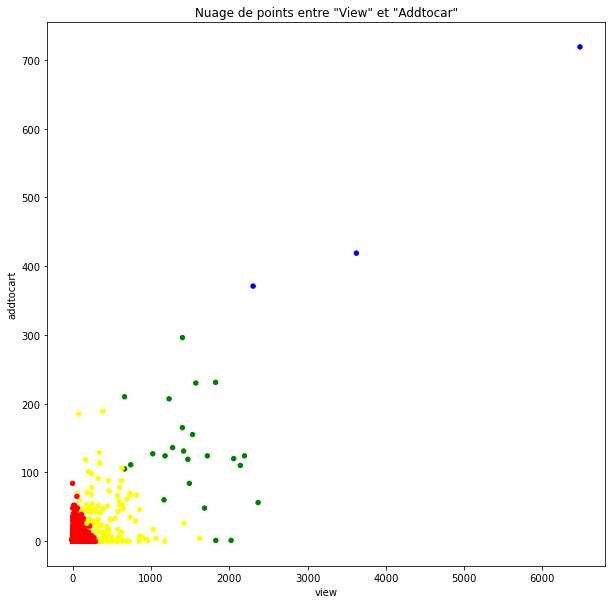

In [45]:
colors = ["red","green","blue","yellow"]
profil_visitor['couleur'] = profil_visitor['cluster_id_final'].map(lambda p: colors[p])

#Nuage de points entre les variables 'view' et 'addtocart'
ax = profil_visitor.plot(kind = "scatter", 
                         x = "view", y= "addtocart", 
                         figsize= (10,10), 
                         c =profil_visitor['couleur'],
                         legend = True,
                         title = 'Nuage de points entre "View" et "Addtocar"')

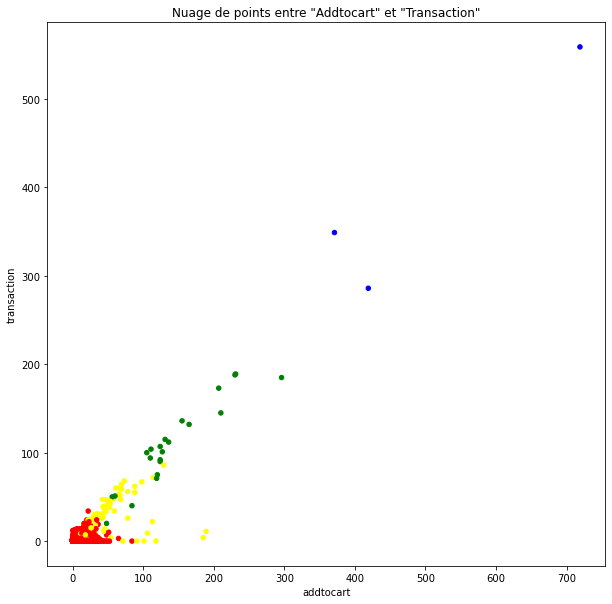

In [46]:
#Nuage de points entre les variables 'addtocart' et 'transaction'
ax = profil_visitor.plot(kind = "scatter", 
                         x = "addtocart", y= "transaction", 
                         figsize= (10,10), 
                         c =profil_visitor['couleur'],
                         legend = True,
                         title = 'Nuage de points entre "Addtocart" et "Transaction"');

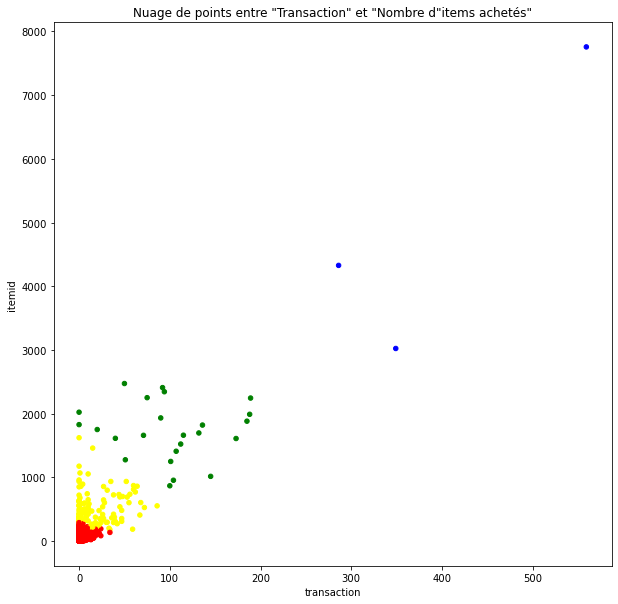

In [47]:
#Nuage de points entre les variables 'transaction' et 'itemid'
ax = profil_visitor.plot(kind = "scatter", 
                         x = "transaction", y= "itemid", 
                         figsize= (10,10), 
                         c =profil_visitor['couleur'],
                         legend = True,
                         title = 'Nuage de points entre "Transaction" et "Nombre d"items achetés"');

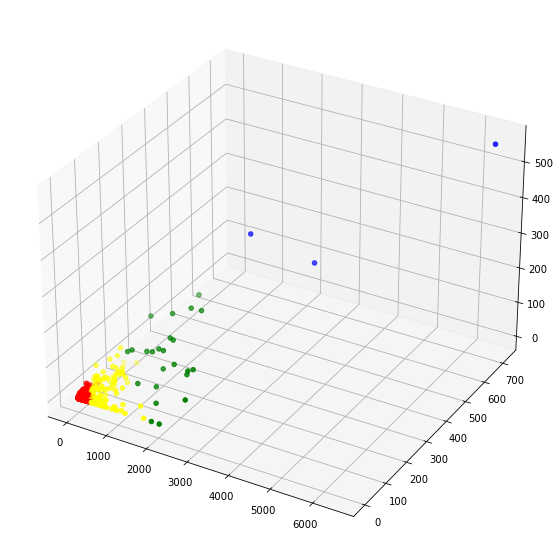

In [49]:
#Représentation graphique à 3 dimensions
plt.figure(figsize=(10,10))
ax = plt.axes(projection="3d")

# Data for three-dimensional scattered points
zdata = profil_visitor['transaction']
xdata = profil_visitor['view']
ydata = profil_visitor['addtocart']

ax.scatter3D(xdata, ydata, zdata, c=profil_visitor['couleur']);